In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical  # Use `to_categorical` directly

from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [4]:
# Paths for data.
Ravdess = "C:\\sers\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\ravdess"
Crema = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D"
Tess = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\tess"
Savee = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\SAVEE"


In [10]:

# Correct path to the Ravdess dataset
Ravdess = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\'

# Get the list of actor directories inside Ravdess folder
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

# Iterate through each actor's directory
for dir in ravdess_directory_list:
    actor_dir = os.path.join(Ravdess, dir)
    
    # Ensure we are only processing directories (to avoid non-directory files like zip)
    if os.path.isdir(actor_dir):
        actor_files = os.listdir(actor_dir)  # Get list of files inside the actor's folder
        
        for file in actor_files:
            if file.endswith('.wav'):  # Check if the file is a .wav file
                part = file.split('.')[0].split('-')  # Split file name to extract emotion
                
                # Third part in each file represents the emotion associated to that file
                emotion = int(part[2])
                file_emotion.append(emotion)
                
                # Append the full file path to the list
                file_path.append(os.path.join(actor_dir, file))

# Create DataFrame for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the DataFrames
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Replace integer emotion labels with actual emotion names
Ravdess_df.Emotions.replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}, inplace=True)

# Display the first few rows of the DataFrame
Ravdess_df.head()


Emotions                                               Path
0  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
1  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
2  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
3  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
4     calm  C:\Users\dell\Desktop\graduation project\AI04-...

In [12]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


Emotions                                               Path
0    angry  C:\Users\dell\Desktop\graduation project\AI04-...
1  disgust  C:\Users\dell\Desktop\graduation project\AI04-...
2     fear  C:\Users\dell\Desktop\graduation project\AI04-...
3    happy  C:\Users\dell\Desktop\graduation project\AI04-...
4  neutral  C:\Users\dell\Desktop\graduation project\AI04-...

In [14]:
# Correct path to the Tess dataset
Tess = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\tess\\'

# Get the list of emotion directories inside Tess folder
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

# Iterate through each emotion directory
for dir in tess_directory_list:
    emotion_dir = os.path.join(Tess, dir)
    
    # Ensure we are only processing directories
    if os.path.isdir(emotion_dir):
        directories = os.listdir(emotion_dir)  # Get the list of files in the emotion directory
        
        for file in directories:
            if file.endswith('.wav'):  # Ensure we only process .wav files
                part = file.split('.')[0]
                part = part.split('_')[2]  # Split file name to extract emotion part
                
                # Replace 'ps' with 'surprise' for emotion
                if part == 'ps':
                    file_emotion.append('surprise')
                else:
                    file_emotion.append(part)
                
                # Append the full file path
                file_path.append(os.path.join(emotion_dir, file))

# Dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenating emotion and path dataframes
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows
Tess_df.head()


Emotions                                               Path
0    angry  C:\Users\dell\Desktop\graduation project\AI04-...
1    angry  C:\Users\dell\Desktop\graduation project\AI04-...
2    angry  C:\Users\dell\Desktop\graduation project\AI04-...
3    angry  C:\Users\dell\Desktop\graduation project\AI04-...
4    angry  C:\Users\dell\Desktop\graduation project\AI04-...

In [15]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()


Emotions                                               Path
0    angry  C:\Users\dell\Desktop\graduation project\AI04-...
1    angry  C:\Users\dell\Desktop\graduation project\AI04-...
2    angry  C:\Users\dell\Desktop\graduation project\AI04-...
3    angry  C:\Users\dell\Desktop\graduation project\AI04-...
4    angry  C:\Users\dell\Desktop\graduation project\AI04-...

In [16]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()


Emotions                                               Path
0  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
1  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
2  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
3  neutral  C:\Users\dell\Desktop\graduation project\AI04-...
4     calm  C:\Users\dell\Desktop\graduation project\AI04-...

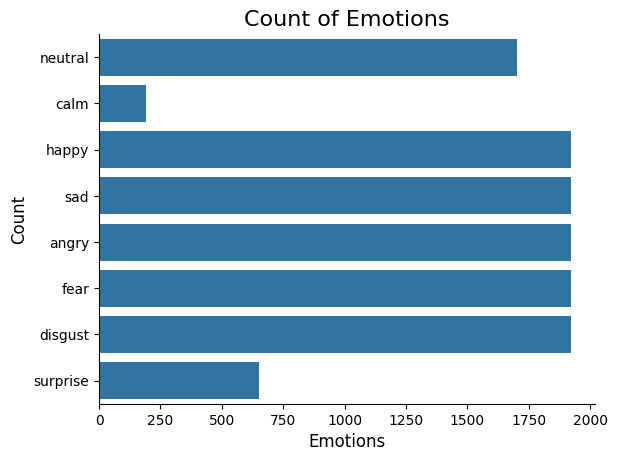

In [17]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [18]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


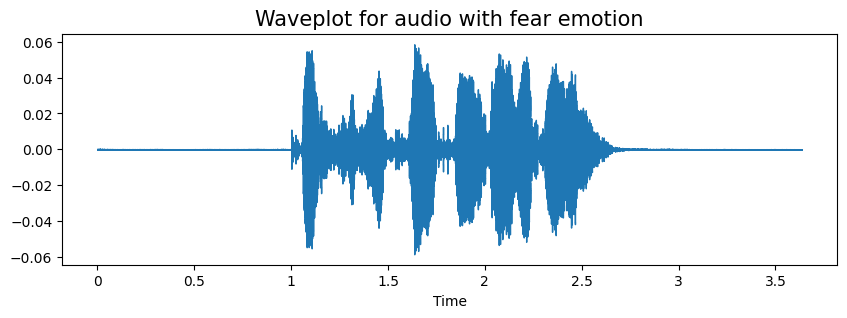

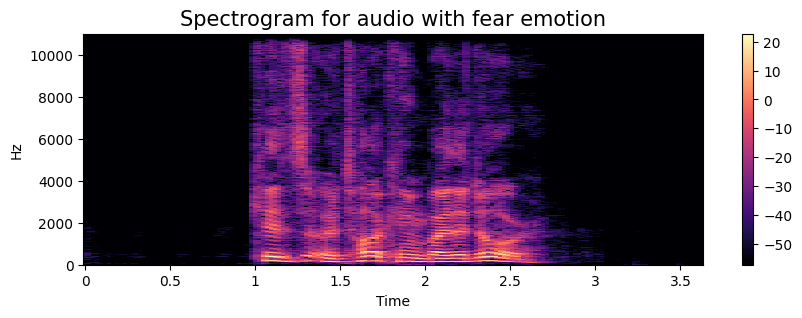

In [20]:
# Function to create waveplot
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# Function to create spectrogram
def create_spectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 3))
    plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

# Example usage
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)

# Create waveplot and spectrogram
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


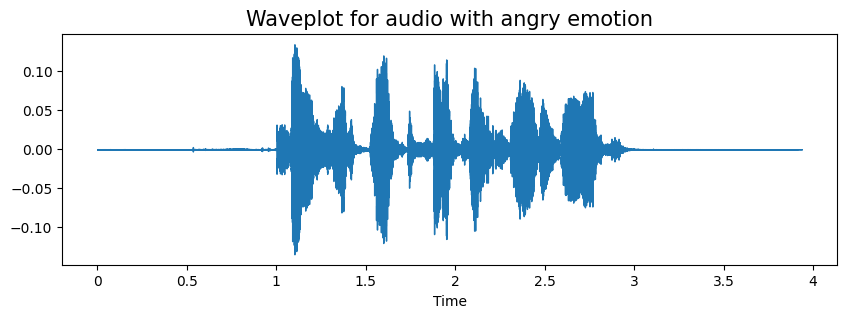

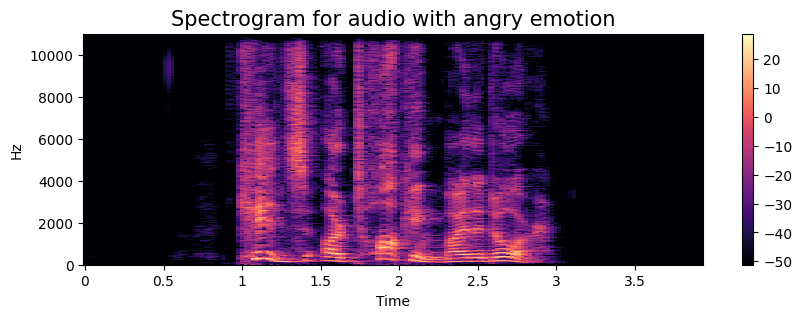

In [21]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


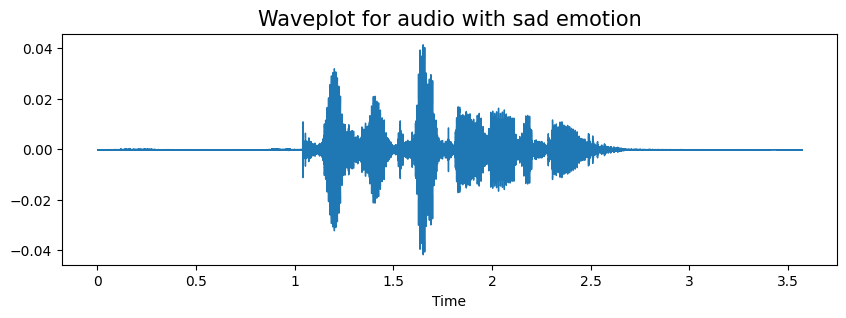

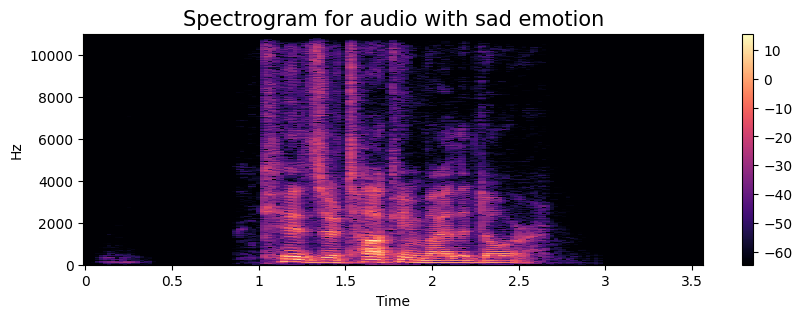

In [22]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


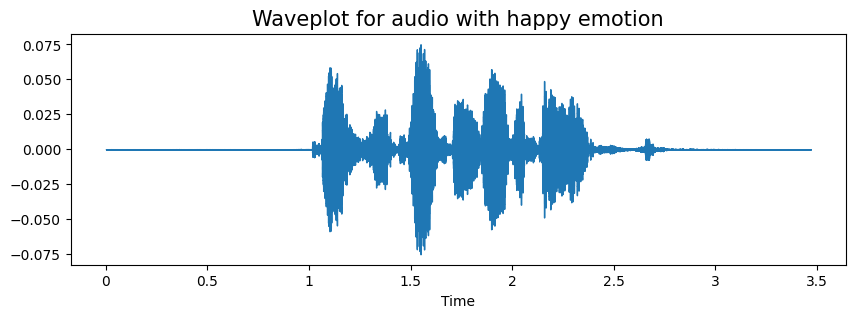

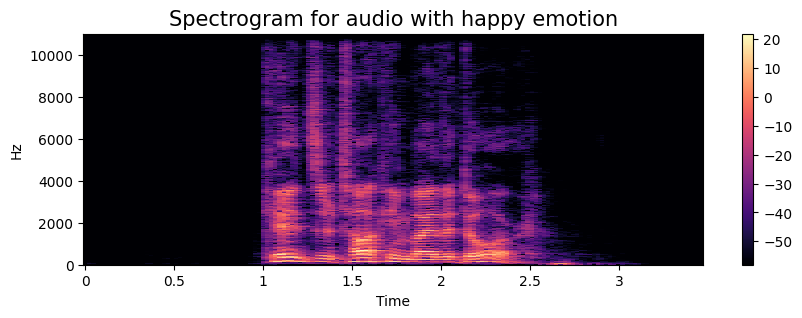

In [23]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [24]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)


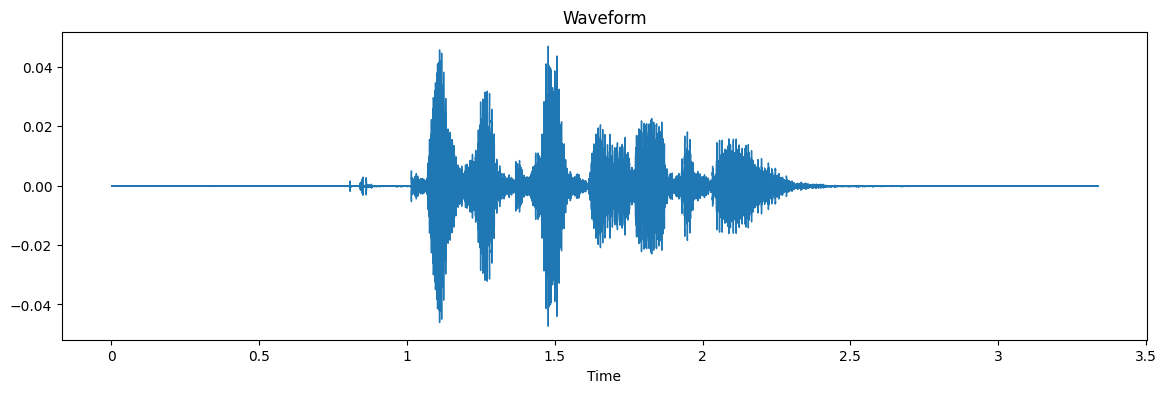

In [27]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)  # Use 'waveshow' instead of 'waveplot'
plt.title('Waveform')
plt.show()

# Play the audio
Audio(path)


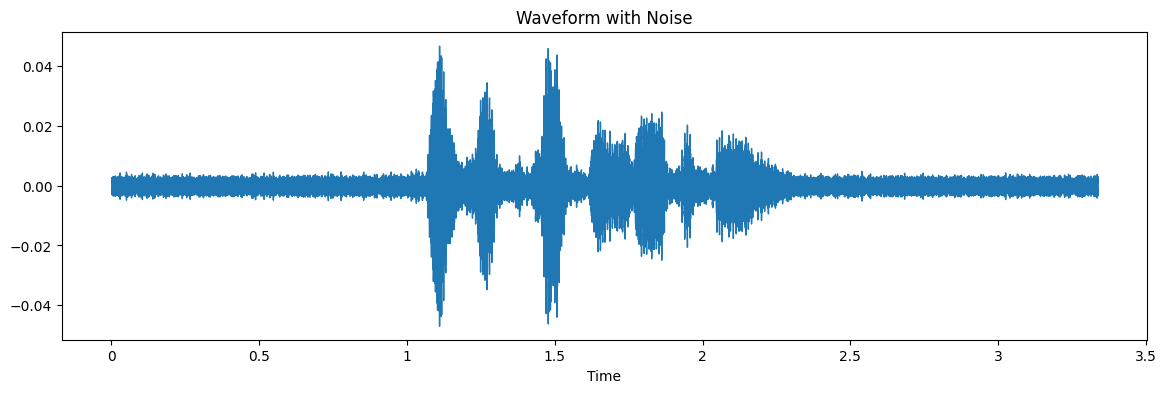

In [30]:
x = noise(data)

# Plot the waveform using 'waveshow'
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Use 'waveshow' instead of 'waveplot'
plt.title('Waveform with Noise')
plt.show()

# Play the modified audio with noise
Audio(x, rate=sample_rate)


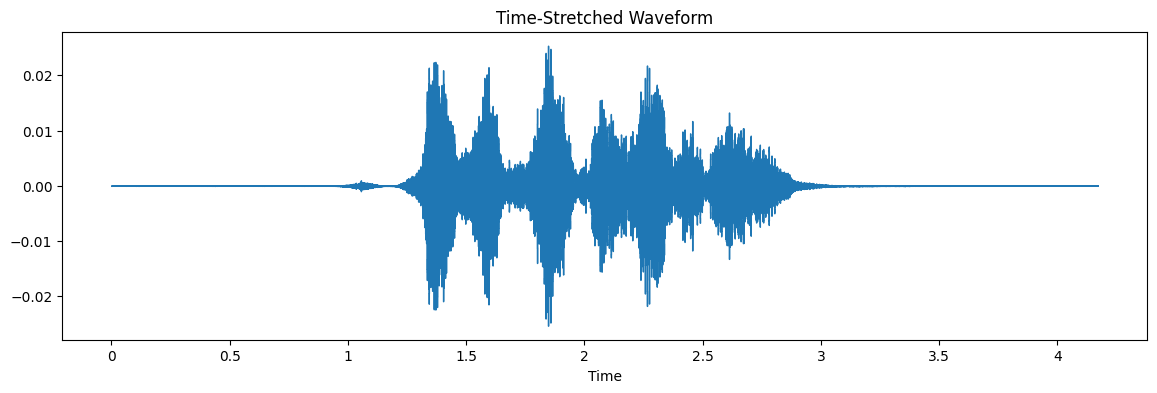

In [33]:
import librosa

# Corrected stretch function for librosa time-stretch
def stretch(data, rate=0.8):
    # Ensure data is a valid numpy array of the audio signal
    if isinstance(data, (list, np.ndarray)):
        return librosa.effects.time_stretch(y=data, rate=rate)
    else:
        raise ValueError("Input data must be a valid audio signal (array).")

# Apply time-stretch to the audio
x = stretch(data, rate=0.8)

# Plot the time-stretched waveform using 'waveshow'
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Correct 'waveshow'
plt.title('Time-Stretched Waveform')
plt.show()

# Play the time-stretched audio
Audio(x, rate=sample_rate)


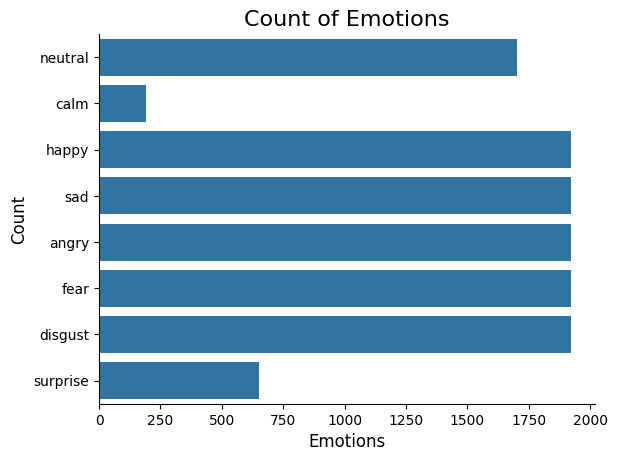

Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-01-01-01-01-01.wav
Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-01-01-01-02-01.wav
Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-01-01-02-01-01.wav
Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-01-01-02-02-01.wav
Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-02-01-01-01-01.wav
Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-02-01-01-02-01.wav
Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-02-01-02-01-01.wav
Accessing file: C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\Actor_01\03-01-02-

In [51]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Paths for data
Ravdess = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\ravdess\\'
Crema = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\AudioWAV\\'
Tess = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\tess\\'
Savee = r'C:\Users\dell\Desktop\graduation project\AI04-Grad\datasets\CREMA-D\SAVEE\\'

# Load datasets (Ravdess, Crema, Tess, Savee)
# Make sure to load your dataframes (Ravdess_df, Crema_df, Tess_df, Savee_df) here

# Combine all datasets into one DataFrame
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
data_path.to_csv("data_path.csv", index=False)

# Visualization of emotion counts
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Define feature extraction functions
def extract_features(data, sample_rate):
    result = np.array([])

    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # Data with noise
    noise_data = noise(data)  # Assuming noise function is defined
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))

    # Data with stretching and pitching
    new_data = stretch(data)  # Assuming stretch function is defined
    data_stretch_pitch = pitch(new_data, sample_rate)  # Assuming pitch function is defined
    res3 = extract_features(data_stretch_pitch, sample_rate)
    result = np.vstack((result, res3))
    
    return result

# Initialize lists for features and labels
X, Y = [], []

# Extract features from all audio files
for index, row in data_path.iterrows():
    path = row['Path']
    emotion = row['Emotions']
    
    # Construct the correct path
    # Ensure this correctly points to your audio files
    file_path = os.path.join(Crema, path)  # Adjust this as needed
    
    # Check if the file exists
    if os.path.isfile(file_path):
        print(f"Accessing file: {file_path}")
        feature = get_features(file_path)
        for ele in feature:
            X.append(ele)
            Y.append(emotion)  # Appending emotion 3 times
    else:
        print(f"File not found: {file_path}")

# Convert to DataFrame and save to CSV
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)

# Display the features DataFrame
print(Features.head())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accuracy: 0.2912 - loss: 1.8049 - val_accuracy: 0.6107 - val_loss: 1.1433 - learning_rate: 0.0010
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.5838 - loss: 1.1580 - val_accuracy: 0.7072 - val_loss: 0.8142 - learning_rate: 0.0010
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.6729 - loss: 0.9090 - val_accuracy: 0.7531 - val_loss: 0.7157 - learning_rate: 0.0010
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.7002 - loss: 0.8338 - val_accuracy: 0.7623 - val_loss: 0.6611 - learning_rate: 0.0010
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.7258 - loss: 0.7549 - val_accuracy: 0.7642 - val_loss: 0.6546 - learning_rate: 0.0010
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.7501 - loss: 0.6739 - val_accuracy: 0.7871 - val_loss: 0.5862 - learning_rate: 0.0010
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.7

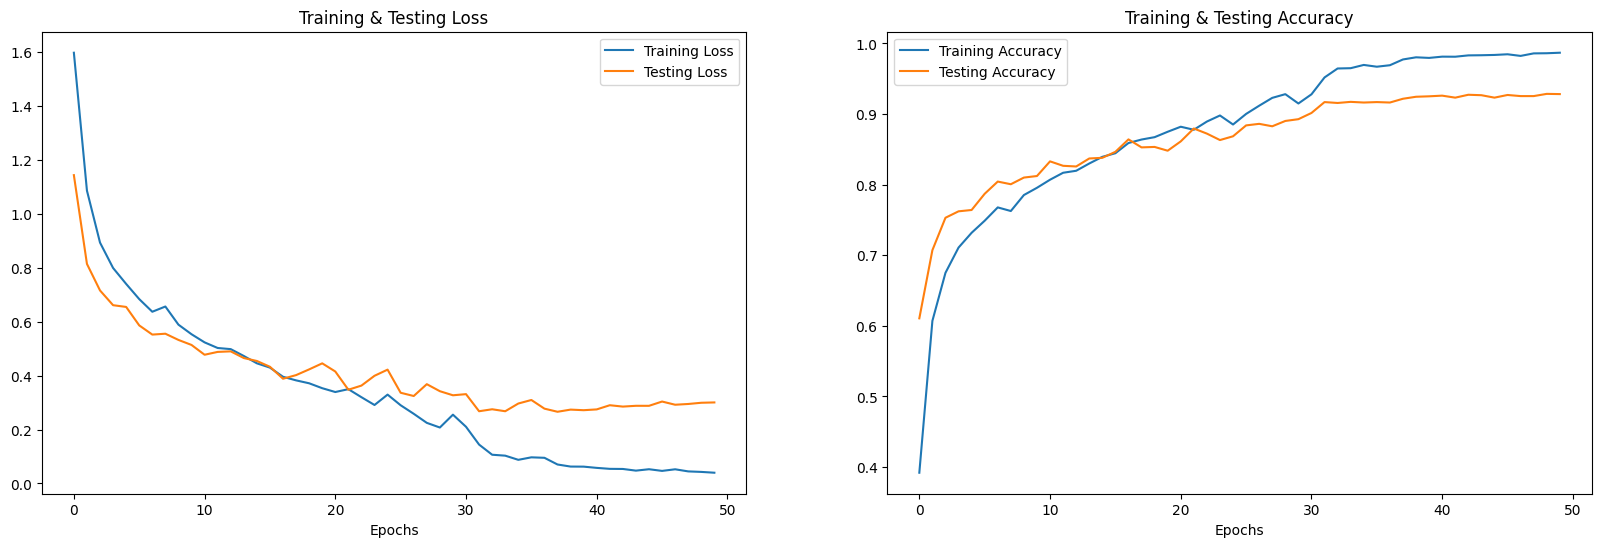

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


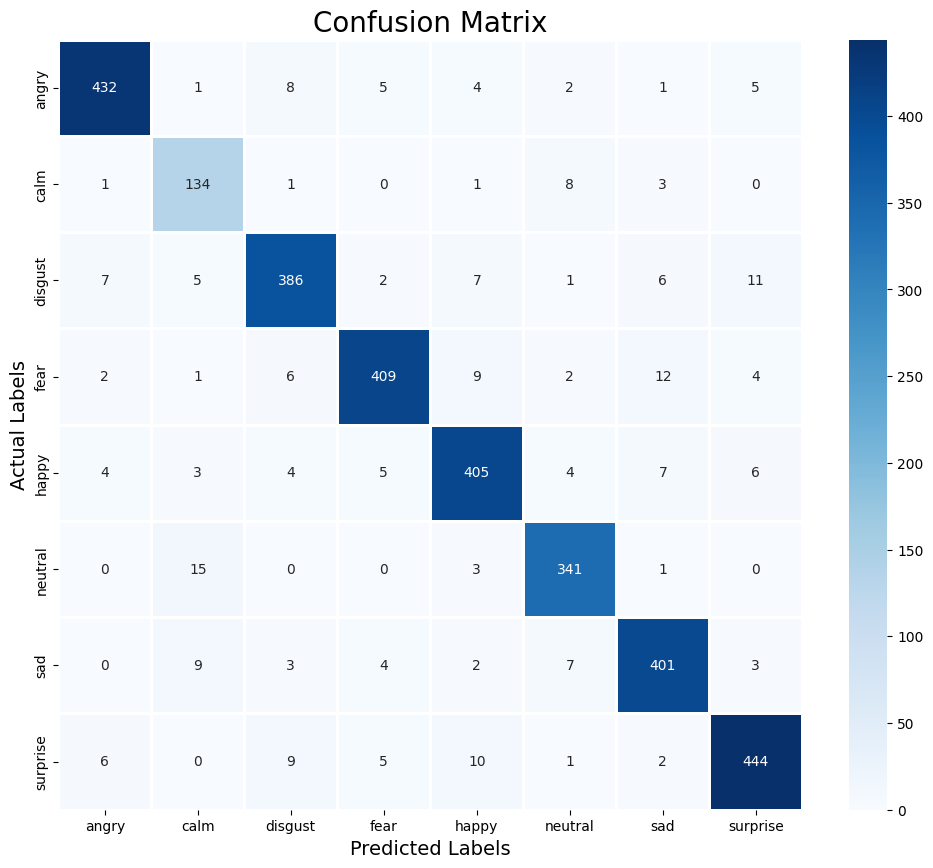

              precision    recall  f1-score   support

       angry       0.96      0.94      0.95       458
        calm       0.80      0.91      0.85       148
     disgust       0.93      0.91      0.92       425
        fear       0.95      0.92      0.93       445
       happy       0.92      0.92      0.92       438
     neutral       0.93      0.95      0.94       360
         sad       0.93      0.93      0.93       429
    surprise       0.94      0.93      0.93       477

    accuracy                           0.93      3180
   macro avg       0.92      0.93      0.92      3180
weighted avg       0.93      0.93      0.93      3180



In [52]:
# Load features and labels
Features = pd.read_csv('features.csv')

# Prepare data
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

# One-hot encode labels
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape data for CNN
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# Build the model
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=len(encoder.categories_[0]), activation='softmax'))  # Use the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Set up learning rate reduction
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=1e-7)

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate the model
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

# Plot training and validation metrics
epochs = [i for i in range(50)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Predict on test data
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

# Get actual labels
y_test_labels = encoder.inverse_transform(y_test)

# Create a DataFrame for comparison
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_labels.flatten()

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Print classification report
print(classification_report(y_test_labels, y_pred))
